<a href="https://colab.research.google.com/github/SonamRohilla/SQL-for-Data-Science/blob/master/animal_moment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let us import the necessary libraries: 

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')


We will load the dataset using the following command: 

In [76]:
animal_data = pd.read_csv('animal_speeds.csv', delimiter=';', header=0)

Exploratory Data Analysis:

Let us check the first few rows of the dataset: 

In [131]:
animal_data.head()

,animal,weight,movement_type,highspeed
0,House sparrow,0.04,0,46.0
1,Pelican,7.80,0,65.0
2,Vulture,11.00,0,88.0
3,Pigeon,0.35,0,80.0
4,Puffin,0.58,0,88.0



We can describe the dataset using .info() command 

In [77]:
animal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   animal         159 non-null    object 
 1   weight         159 non-null    float64
 2   movement_type  159 non-null    object 
 3   highspeed      159 non-null    float64
dtypes: float64(2), object(2)
memory usage: 5.1+ KB


In [78]:
animal_data.describe(include='all')

,animal,weight,movement_type,highspeed
count,159,159.000000,159,159.000000
unique,154,NaN,4,NaN
top,Alligator,NaN,running,NaN
freq,2,NaN,78,NaN
mean,NaN,1994.115969,NaN,52.640881
std,NaN,12285.311105,NaN,34.460258
min,NaN,0.001000,NaN,1.500000
25%,NaN,2.625000,NaN,30.000000
50%,NaN,22.000000,NaN,48.000000
75%,NaN,310.000000,NaN,70.000000


It is 159 rows and 4 columns dataset, and there are no null values in it. The output ‘highspeed’ is the target and there are multiple independent variables which affect this value. This is a type of supervised Machine Learning problem where the output variables are labelled and the model is first trained on split data. The model is then verified for its accuracy on validation/test data. 

In [80]:
numerical_features = [feature for feature in animal_data.columns if animal_data[feature].dtypes != 'O']
categorical_features = [feature for feature in animal_data.columns if animal_data[feature].dtype == 'O']
print("numerical_features")
print(numerical_features)
print()
print('categorical_features')
print(categorical_features)

numerical_features
['weight', 'highspeed']

categorical_features
['animal', 'movement_type']


Finding the categorial and numercial features

Checking null Values in Data provided

In [81]:
animal_data.isnull()

,animal,weight,movement_type,highspeed
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
154,False,False,False,False
155,False,False,False,False
156,False,False,False,False
157,False,False,False,False


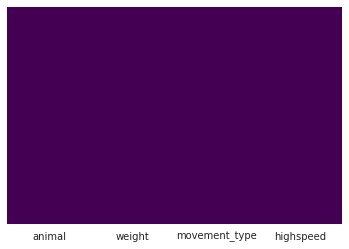

In [82]:
sns.heatmap(animal_data.isnull(),yticklabels=False, cbar=False, cmap='viridis')

Visualisation method (heatmap)to check the null values in data

Univarient Analysis

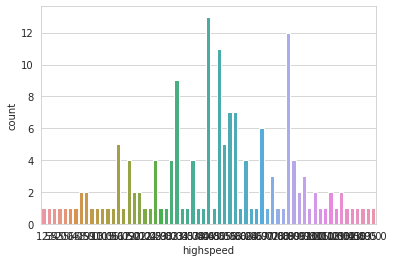

In [83]:
sns.set_style('whitegrid')
sns.countplot(x='highspeed', data=animal_data)

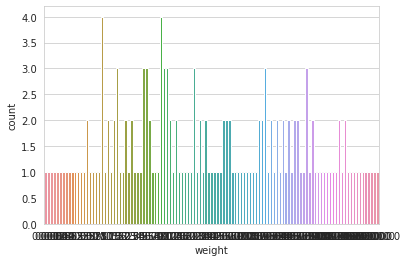

In [84]:
sns.set_style('whitegrid')
sns.countplot(x='weight', data=animal_data)

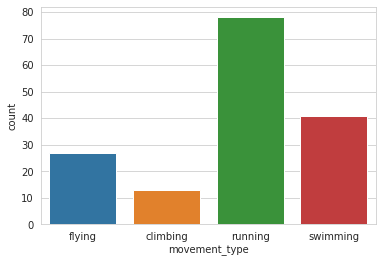

In [85]:
sns.set_style('whitegrid')
sns.countplot(x='movement_type', data=animal_data)

Around 78% animals' movement type is running, 41% is swimming and 28%, 13%  animals' movement type is flying and climbing respectively.

Bivariet Analysis

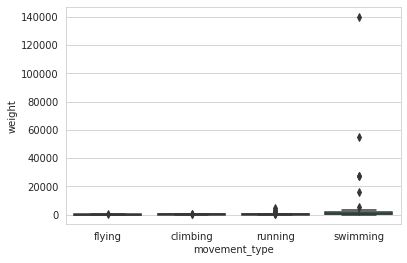

In [86]:
sns.boxplot(x='movement_type', y='weight', data=animal_data, palette='winter')

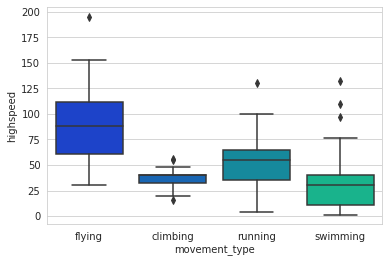

In [87]:
sns.boxplot(x='movement_type', y='highspeed', data=animal_data, palette='winter')

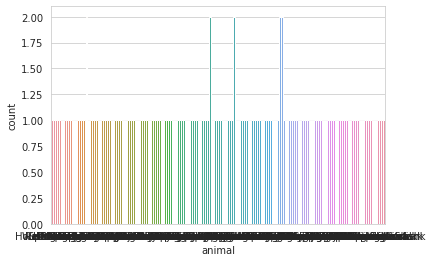

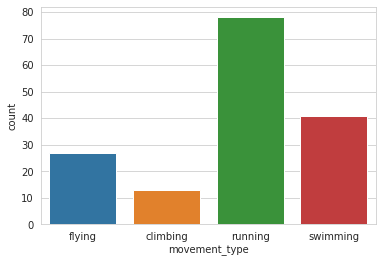

In [88]:
for feature in categorical_features:
    sns.countplot(data=animal_data, x=feature)
    plt.show()

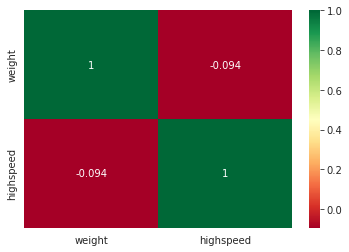

In [89]:

sns.heatmap(animal_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

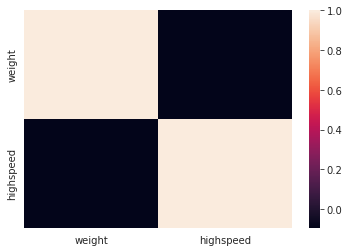

In [90]:

# plotting correlation heatmap
dataplot = sns.heatmap(animal_data.corr())
  
# displaying heatmap
plt.show()


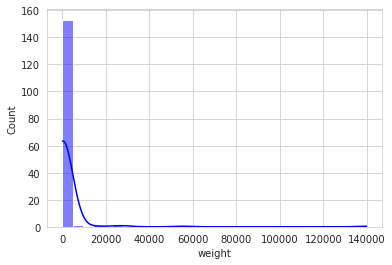

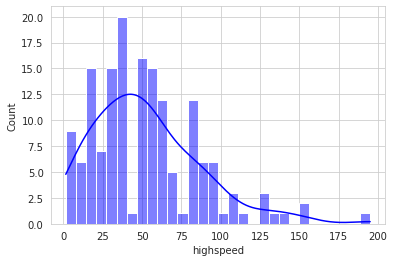

In [91]:
for feature in numerical_features:
    sns.histplot(data=animal_data, x=feature,kde=True, bins=30, color='blue')
    plt.show();

Histogram to Check guassian distribution in data

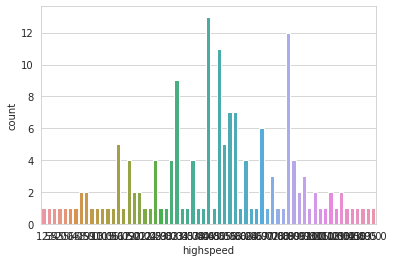

In [92]:
sns.countplot(x='highspeed', data= animal_data)

converting categorial features

In [93]:
movement=pd.get_dummies(animal_data['movement_type'],drop_first=True).head()

In [94]:
movement.head()

,flying,running,swimming
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [119]:
animal_data2 = animal_data.replace({'movement_type':{'flying':0,'running':1,'swimming':2,'climbing':4}},inplace=True) 

In [120]:
animal_data1=pd.concat([animal_data,animal_data2],axis=1)

In [121]:
animal_data1.head()

,animal,weight,movement_type,highspeed
0,House sparrow,0.04,0,46.0
1,Pelican,7.80,0,65.0
2,Vulture,11.00,0,88.0
3,Pigeon,0.35,0,80.0
4,Puffin,0.58,0,88.0


In [122]:
animal_data1["animal"].value_counts()

Alligator                     2
Hippopotamus                  2
Red-breasted Merganser        2
North American River Otter    2
Groin crocodile               2
                             ..
Bobcat                        1
Brown Bear                    1
Caribou                       1
Cheetah                       1
Ocean sunfish                 1
Name: animal, Length: 154, dtype: int64

we will be using logrithmic transformation
 

In [123]:
animal_data1.drop(['animal'],axis=1, inplace=True)

In [124]:
animal_data1.head()

,weight,movement_type,highspeed
0,0.04,0,46.0
1,7.80,0,65.0
2,11.00,0,88.0
3,0.35,0,80.0
4,0.58,0,88.0


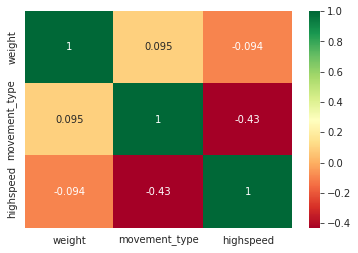

In [125]:
sns.heatmap(animal_data1.corr(), annot = True, cmap = "RdYlGn")

# Display the Pharma Sector Heatmap
plt.show()

In [116]:
animal_data2 = animal_data1.replace({'movement_type':{'flying':0,'running':1,'swimming':2,'climbing':4}},inplace=True) 

In [134]:
animal_data1['highspeed'].head()

0    46.0
1    65.0
2    88.0
3    80.0
4    88.0
Name: highspeed, dtype: float64

In [137]:
from sklearn.model_selection import train_test_split

In [192]:
X = animal_data1.drop(['highspeed'],axis=1) 
Y = animal_data1['highspeed'] 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=0) 

In [193]:
X_train, X_test, y_train, y_test = train_test_split(animal_data1.drop('highspeed',axis=1), 
                                                    animal_data1['highspeed'], test_size=0.25, 
                                                    random_state=0)

**Training** and **Predicting** **bold text**

In [194]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 

In [195]:
# loading the linear regression model 
lin_reg_model = LinearRegression() 
#Now we can fit the model to our dataset 
lin_reg_model.fit(X_train,Y_train) 

LinearRegression()

In [196]:
training_data_prediction = lin_reg_model.predict(X_train) 

In [197]:
from sklearn.metrics import confusion_matrix

In [190]:
accuracy=confusion_matrix(y_test,training_data_prediction)

ValueError: ignored

In [203]:
accuracy

NameError: ignored

In [204]:
from sklearn.metrics import accuracy_score

In [202]:
accuracy=accuracy_score(y_test,training_data_prediction)
accuracy

NameError: ignored

In [205]:
predictions

NameError: ignored

Evaluation
We can check precision,recall,f1-score using classification report!

In [206]:
from sklearn.metrics import classification_report

In [208]:
print(classification_report(y_test,training_data_prediction))

ValueError: ignored

In [198]:
train_error_score = metrics.r2_score(Y_train, training_data_prediction) 
print("R squared Error - Training : ", train_error_score) 

R squared Error - Training :  0.18885092878544285


In [199]:
Y_pred = lin_reg_model.predict(X_test) 

In [200]:
test_error_score = metrics.r2_score(Y_test, Y_pred) 
print("R squared Error - Test: ", test_error_score) 

R squared Error - Test:  -0.4153111496273949


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


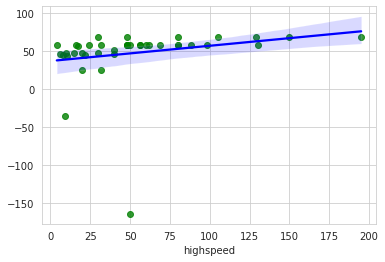

In [201]:
# create scatterplot with regression line 

sns.regplot(Y_test, Y_pred, scatter_kws={"color": "green"}, line_kws={"color": "blue"}) 